In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('aggregated_efficientnet_median.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def hist(df, features):
    melt = metric_melt(df.sample(200),
            features=features,
            metadata_features=meta_features)
    #bins = np.arange(-0.005, 0.005, 0.001)
    plt.style.use({'figure.facecolor':'white'})
    plt.hist(melt.similarity_metric)
def feats(df):
    features_ = []
    for col in df.columns.tolist():
        if col.startswith('efficient'):
            features_.append(col)
    return features_
features = feats(df)
meta_features = []
for col in df.columns.tolist():
    if col.startswith('Metadata_'):
        meta_features.append(col)

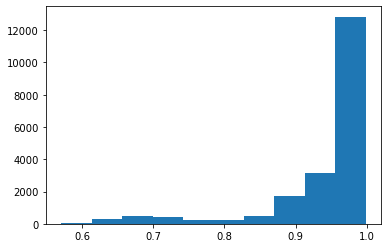

In [4]:
# plot the similarity of the wells. Expected output from a pretrained net.
hist(df,features)
dmso = df.query("Metadata_broad_sample == 'DMSO'")

Explained variation per principal component: [0.53239571 0.15976469 0.05138625]


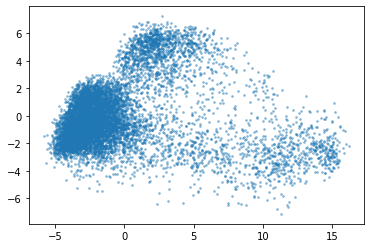

In [5]:
def pca_plot(df):
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(df[features].values)
    df['pca-one'] = pca_result[:,0]
    df['pca-two'] = pca_result[:,1]
    df['pca-three'] = pca_result[:,2]
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
    plt.style.use({'figure.facecolor':'white'})
    plt.scatter(df['pca-one'], df['pca-two'], s = 3, alpha= 0.4)
    plt.show()
pca_plot(df)

In [6]:
well = np.load('F09_1.npz', allow_pickle=True)
well.f.locations.max()

1067.4849334267699

Explained variation per principal component: [0.53239571 0.15976469]


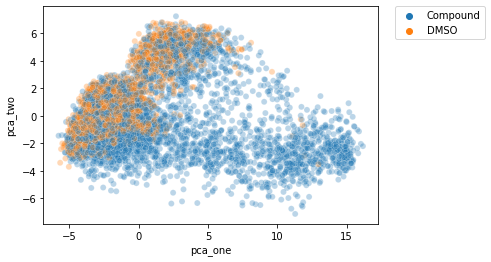

In [7]:
import seaborn as sns
df = df.sample(frac = 1)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features].values)
df['pca_one'] = pca_result[:,0]
df['pca_two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
def is_dmso(sample):
    if sample == 'DMSO':
        return 'DMSO'
    else:
        return 'Compound'
df['DMSO'] = df.Metadata_broad_sample.apply(is_dmso)
gfg = sns.scatterplot(data=df, x="pca_one", y='pca_two', hue='DMSO', sizes=3, alpha=0.3)
plt.style.use({'figure.facecolor':'white'})
plt.setp(gfg.get_legend().get_texts(), fontsize='5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

[None, None, None, None, None, None]

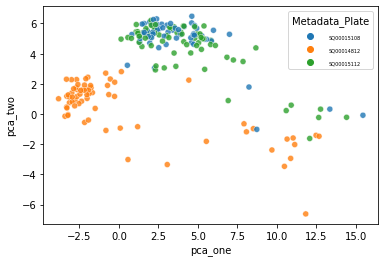

In [8]:
selection = ['SQ00014812', 'SQ00015112', 'SQ00015108']
sel = df[df["Metadata_Plate"].isin(selection)]
gfg = sns.scatterplot(data=sel.iloc[:], x="pca_one", y='pca_two', hue='Metadata_Plate', sizes=3, alpha=0.8)
plt.style.use({'figure.facecolor':'white'})
plt.setp(gfg.get_legend().get_texts(), fontsize='5')
#gfg.legend_.remove()

ValueError: Could not interpret value `pca_one` for parameter `x`

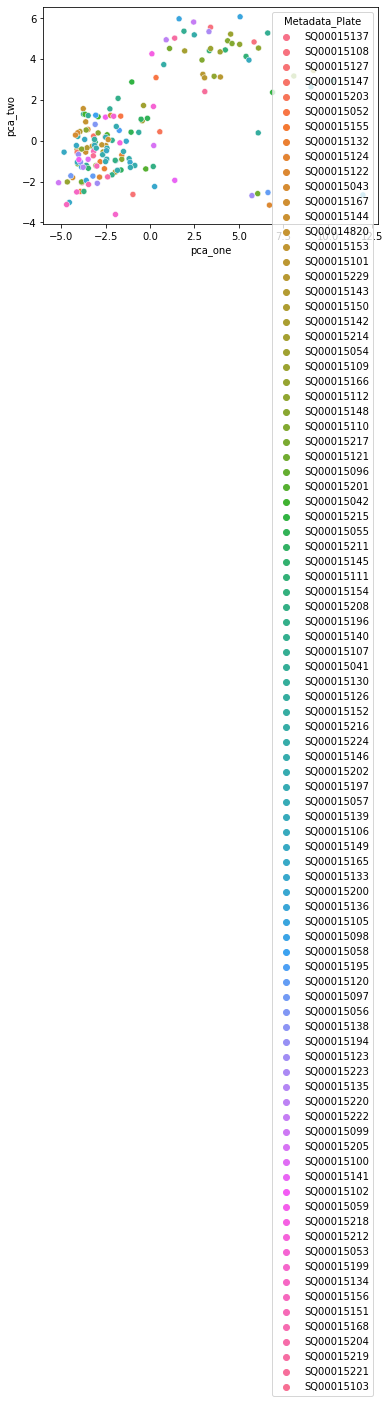

In [10]:
moa_df = df.query("Metadata_moa == 'phosphodiesterase inhibitor'")
gfg = sns.scatterplot(data=moa_df, x="pca_one", y='pca_two', hue='Metadata_Plate', sizes=3)
gfg = sns.scatterplot(data=dmso, x="pca_one", y='pca_two', hue='Metadata_broad_sample', sizes=3, alpha=0.05)
plt.setp(gfg.get_legend().get_texts(), fontsize='5')
plt.style.use({'figure.facecolor':'white'})
gfg.legend_.remove()